KNN 
k-nearest neighbors
supervised learning classifier

Binary Classification -> classification of 2 outcomes only 

Main Idea of KNN: Similar points can be found near each other
- Given data, if we plot it we may be able to find clusters or groups 
- Given an unclassified point, we may be able to assign it to one of the groups given its proximity to "k" known points
- Lazy Learning Model -> memorizes training data rather than constructing a general model -> requires a lot of memory

Pros:
- The more data we have, more accurate the algorithm is 
- easy to implement

Cons:
- Peformance is dependent on our chosen k value 
- Requires a lot of memory 
- Need to calculate distances of many data points




In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
df = pd.read_csv("./data/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
df = df[df["Species"].isin(["Bream", "Smelt"])][["Species", "Weight", "Length2"]]

In [9]:
df.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [10]:
df.tail()

,Species,Weight,Length2
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3
158,Smelt,19.9,15.0


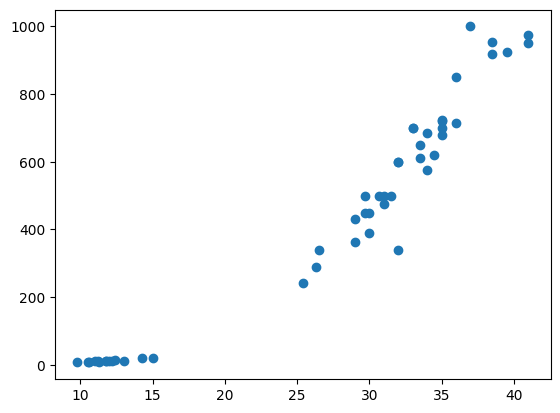

In [11]:
plt.figure()
plt.scatter(data=df, x="Length2", y="Weight")
plt.show()

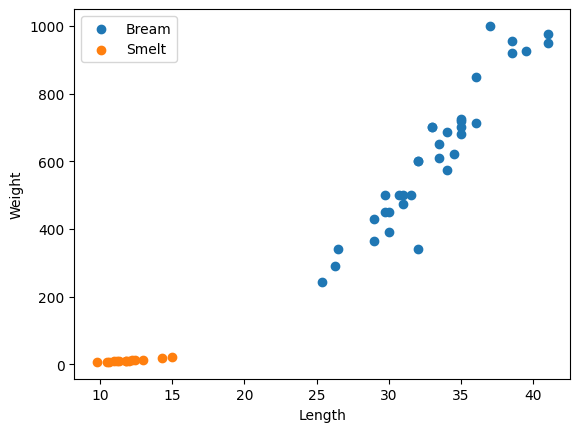

In [12]:
groups = df.groupby("Species")
plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"], 
                group["Weight"], 
                label = name)
    
plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

Bream -> Length to Weight is proportional
Smelt -> Weight seems to be fairly constant 

In [13]:
le = LabelEncoder()

In [14]:
df["label"] = le.fit_transform(df["Species"])

In [15]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [16]:
df["label"].value_counts()

label
0    35
1    14
Name: count, dtype: int64

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [18]:
knn.fit(df[["Length2", "Weight"]], df[["label"]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [19]:
# calculate accuracy
knn.score(df[["Length2", "Weight"]], df["label"])

1.0

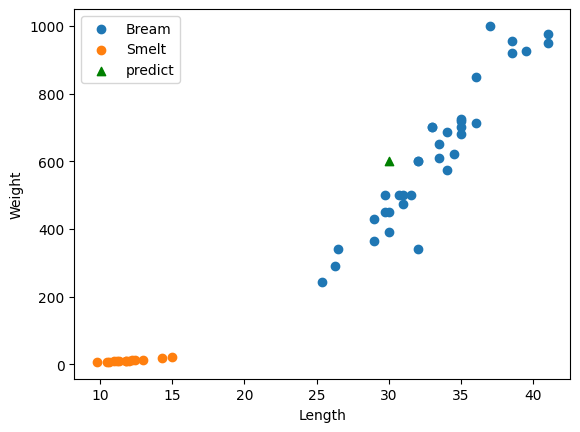

In [20]:
groups = df.groupby("Species")

plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"], 
                group["Weight"], 
                label = name)
    
plt.scatter(30, 600, c = "g", marker = "^", label = "predict")

plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [21]:
knn.predict([[30, 600]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
le.inverse_transform([0])

array(['Bream'], dtype=object)